In [1]:
# Plots the VPRM outcome for different evi data sources and morris parameter pre analysis 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import Functions
from scipy import stats
import datetime
from VPRM_offline.src.Offline_VPRM_for_Morris import flatten_list_2d
# from src.Offline_VPRM_for_Morris import flatten_list_2d


%run Functions.py

In [2]:
"""
Get the vprm data and plot them to compare to original 
"""

cwd = '/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/'
year = 2018
StationDataPath = cwd + 'data/HH_Data_small/'

#get station names with year 

path_vprm_output = cwd + 'VPRMoutput/'
path_modis_pp = path_vprm_output + 'VPRM.MODIS_pp_'+str(year)+'.csv' 
path_sentinel = path_vprm_output + 'VPRM.SENTINEL2_500m_'+ str(year)+'.csv' 
path_modis = path_vprm_output + 'VPRM.MODIS_500m_'+str(year)+'.csv'
morris_tag = '_Sentinel_' #also be '_' for modis pp old or '_MODIS_pp_' or '_MODIS_'

df_mod_p= pd.read_csv(path_modis_pp)
df_sen = pd.read_csv(path_sentinel)
df_mod = pd.read_csv(path_modis)

stations, snames = get_stations_year(year)
stations.set_index(stations['Station'], inplace=True)
snames = ['SE-Nor']


In [3]:
df_mod_p

,Times,FI-Hyy_GEE,FI-Hyy_RSP,FI-Hyy_NEE,FI-Hyy_EVI,FI-Hyy_LSWI,FI-Let_GEE,FI-Let_RSP,FI-Let_NEE,FI-Let_EVI,...,SE-Htm_GEE,SE-Htm_RSP,SE-Htm_NEE,SE-Htm_EVI,SE-Htm_LSWI,SE-Nor_GEE,SE-Nor_RSP,SE-Nor_NEE,SE-Nor_EVI,SE-Nor_LSWI
0,2018-01-01 00:00:00,-0.0,207.934992,207.934992,0.573698,0.533674,NaN,207.934992,NaN,NaN,...,-0.0,1974.926426,1974.926426,0.231445,0.365994,-0.0,207.934992,207.934992,0.363961,0.395785
1,2018-01-01 00:30:00,-0.0,207.934992,207.934992,0.573109,0.533363,NaN,207.934992,NaN,NaN,...,-0.0,1975.716254,1975.716254,0.231286,0.365417,-0.0,207.934992,207.934992,0.363825,0.395984
2,2018-01-01 01:00:00,-0.0,207.934992,207.934992,0.572520,0.533052,NaN,207.934992,NaN,NaN,...,-0.0,1976.506083,1976.506083,0.231127,0.364839,-0.0,207.934992,207.934992,0.363690,0.396184
3,2018-01-01 01:30:00,-0.0,207.934992,207.934992,0.571931,0.532741,NaN,207.934992,NaN,NaN,...,-0.0,1843.349136,1843.349136,0.230968,0.364261,-0.0,207.934992,207.934992,0.363555,0.396383
4,2018-01-01 02:00:00,-0.0,207.934992,207.934992,0.571342,0.532431,NaN,207.934992,NaN,NaN,...,-0.0,1710.192190,1710.192190,0.230809,0.363683,-0.0,207.934992,207.934992,0.363420,0.396583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2018-12-31 21:30:00,NaN,207.934992,NaN,NaN,0.263521,NaN,207.934992,NaN,NaN,...,-0.0,2819.081930,2819.081930,0.219733,0.198039,NaN,207.934992,NaN,NaN,NaN
17516,2018-12-31 22:00:00,NaN,207.934992,NaN,NaN,0.263577,NaN,207.934992,NaN,NaN,...,-0.0,2844.709224,2844.709224,0.219778,0.198089,NaN,207.934992,NaN,NaN,NaN
17517,2018-12-31 22:30:00,NaN,207.934992,NaN,NaN,0.263634,NaN,207.934992,NaN,NaN,...,-0.0,2897.509221,2897.509221,0.219822,0.198139,NaN,207.934992,NaN,NaN,NaN
17518,2018-12-31 23:00:00,NaN,207.934992,NaN,NaN,0.263691,NaN,207.934992,NaN,NaN,...,-0.0,2950.309218,2950.309218,0.219866,0.198190,NaN,207.934992,NaN,NaN,NaN


In [4]:
for station in snames: 
    path_morris = path_vprm_output + 'VPRM.MORRIS_'+station+morris_tag+str(year)+'.csv'
    df_morris = pd.read_csv(path_morris).add_suffix('_morris')
    df_morris.rename 
    print(df_morris.head(5))
    col_list = [col for col in df_mod_p.columns if station in col]
    df_mod_ps = df_mod_p[col_list].add_suffix('_mod_pp')
    print(df_mod_ps.head(5))
    col_list = [col for col in df_mod.columns if station in col]
    df_mod_s = df_mod[col_list].add_suffix('_mod')
    print(df_mod_s.head(5))
    col_list = [col for col in df_sen.columns if station in col]
    df_sen_s = df_sen[col_list].add_suffix('_sen')
    print(df_sen_s.head(5))


   NEE_VUT_REF_morris  NEE_morris  NEE_prior_morris
0            6.561524     6.84288          0.219579
1            6.528488     6.84288          0.219579
2            4.822406     6.84288          0.219579
3            6.355211     6.84288          0.219579
4            8.301516     6.84288          0.219579
   SE-Nor_GEE_mod_pp  SE-Nor_RSP_mod_pp  SE-Nor_NEE_mod_pp  SE-Nor_EVI_mod_pp  \
0               -0.0         207.934992         207.934992           0.363961   
1               -0.0         207.934992         207.934992           0.363825   
2               -0.0         207.934992         207.934992           0.363690   
3               -0.0         207.934992         207.934992           0.363555   
4               -0.0         207.934992         207.934992           0.363420   

   SE-Nor_LSWI_mod_pp  
0            0.395785  
1            0.395984  
2            0.396184  
3            0.396383  
4            0.396583  
   SE-Nor_GEE_mod  SE-Nor_RSP_mod  SE-Nor_NEE_mod  SE-Nor

In [5]:
df = pd.concat([df_mod['Times'], df_morris, df_mod_ps, df_mod_s, df_sen_s], axis = 1).reset_index(drop=True)
cols = ['Times', 'NEE_VUT_REF_morris', 'NEE_morris', station+'_NEE_mod_pp', station+'_NEE_mod', station+'_NEE_sen']
df = df[cols].rename(columns={'NEE_VUT_REF_morris': 'Original'})
df[[station+'_NEE_mod_pp', station+'_NEE_mod', station+'_NEE_sen']] = df[[station+'_NEE_mod_pp', station+'_NEE_mod', station+'_NEE_sen']]/1000
df.head()

,Times,Original,NEE_morris,SE-Nor_NEE_mod_pp,SE-Nor_NEE_mod,SE-Nor_NEE_sen
0,2018-01-01 00:00:00,6.561524,6.84288,0.207935,0.207935,0.207935
1,2018-01-01 00:30:00,6.528488,6.84288,0.207935,0.207935,0.207935
2,2018-01-01 01:00:00,4.822406,6.84288,0.207935,0.207935,0.207935
3,2018-01-01 01:30:00,6.355211,6.84288,0.207935,0.207935,0.207935
4,2018-01-01 02:00:00,8.301516,6.84288,0.207935,0.207935,0.207935


In [6]:
df.columns
# dfm = df.melt('Times', var_name='cols', value_name='vals')

Index(['Times', 'Original', 'NEE_morris', 'SE-Nor_NEE_mod_pp',
       'SE-Nor_NEE_mod', 'SE-Nor_NEE_sen'],
      dtype='object')

In [7]:
# sns.catplot(x="Times", y="vals", hue='cols', data=dfm, kind='point')

In [8]:
df.Times = pd.to_datetime(df['Times'])

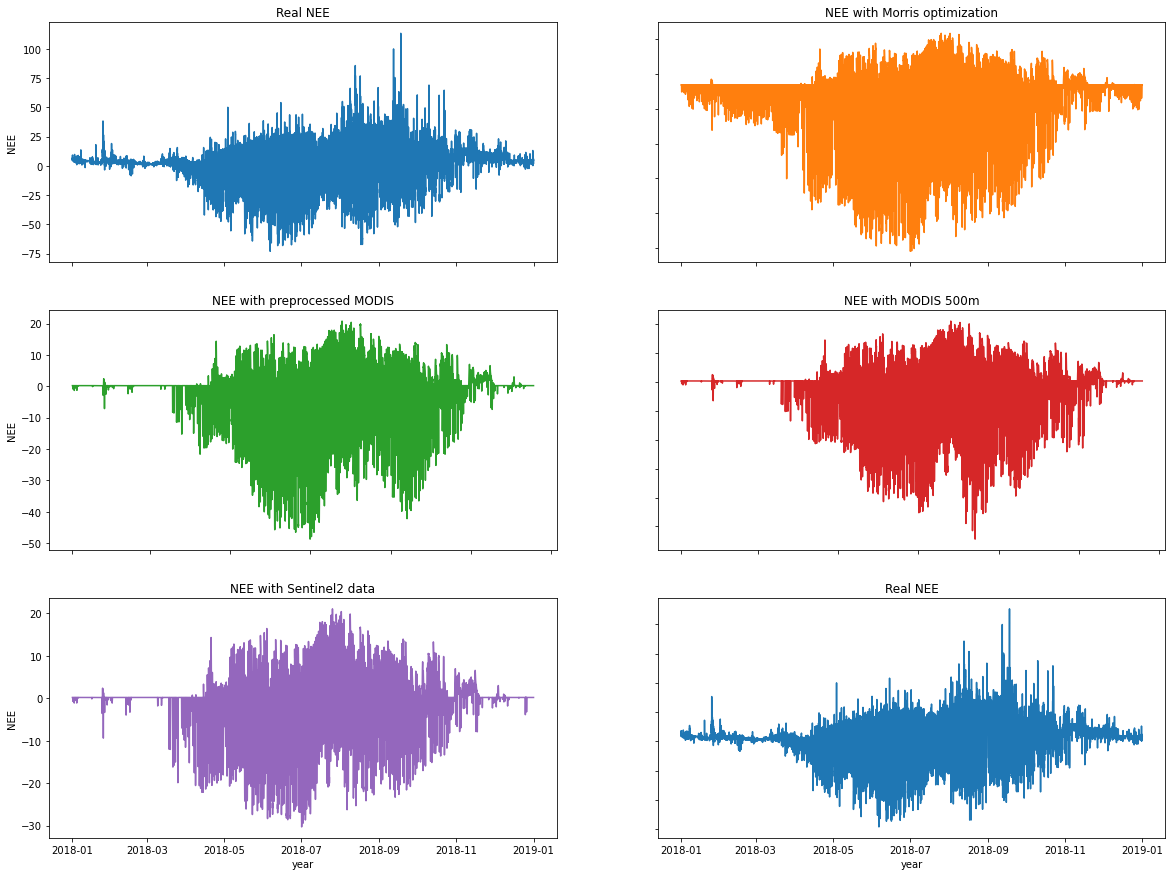

In [9]:
x = df.Times
fig, axs = plt.subplots(3, 2, figsize=(20,15))
axs[0, 0].plot(x, df['Original'])
axs[0, 0].set_title('Real NEE')
axs[0, 1].plot(x, df['NEE_morris'], 'tab:orange')
axs[0, 1].set_title('NEE with Morris optimization')
axs[1, 0].plot(x, df[station+'_NEE_mod_pp'], 'tab:green')
axs[1, 0].set_title('NEE with preprocessed MODIS')
axs[1, 1].plot(x, df[station+'_NEE_mod'], 'tab:red')
axs[1, 1].set_title('NEE with MODIS 500m')
axs[2, 0].plot(x, df[station+'_NEE_sen'], 'tab:purple')
axs[2, 0].set_title('NEE with Sentinel2 data')
axs[2, 1].plot(x, df['Original'])
axs[2, 1].set_title('Real NEE')

for ax in axs.flat:
    ax.set(xlabel='year', ylabel='NEE')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<AxesSubplot:xlabel='Times'>

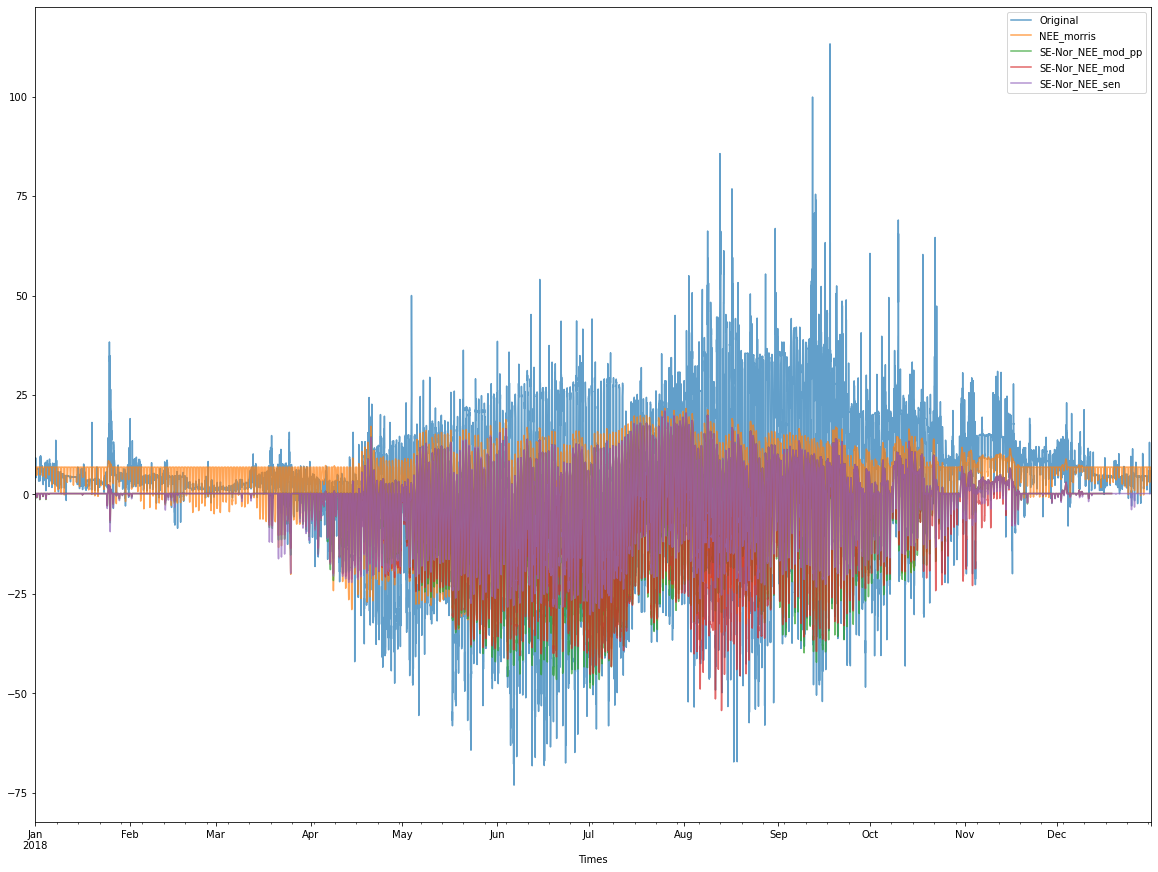

In [10]:
df.plot(x = 'Times', figsize = (20,15), alpha=0.7)

In [11]:
df.describe()

,Original,NEE_morris,SE-Nor_NEE_mod_pp,SE-Nor_NEE_mod,SE-Nor_NEE_sen
count,17520.000000,17520.000000,16897.000000,16897.000000,17520.000000
mean,2.970385,0.101771,-4.180586,-4.381679,-1.784771
std,18.603299,13.159147,12.516631,12.589083,8.740037
min,-73.107429,-40.902201,-48.731968,-54.351875,-30.294828
25%,-2.444209,-5.764499,-8.622280,-9.279521,-4.519806
50%,4.527554,6.842880,0.207935,0.207935,0.207935
75%,12.935989,6.842880,1.424376,1.171239,1.645813
max,113.273234,21.616289,20.784765,20.863968,21.082447


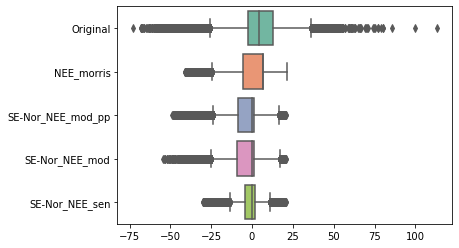

In [12]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [13]:
df.columns

Index(['Times', 'Original', 'NEE_morris', 'SE-Nor_NEE_mod_pp',
       'SE-Nor_NEE_mod', 'SE-Nor_NEE_sen'],
      dtype='object')

In [14]:
df.Times = pd.to_datetime(df['Times'])
print(df.dtypes)
df = df.set_index('Times')

Times                datetime64[ns]
Original                    float64
NEE_morris                  float64
SE-Nor_NEE_mod_pp           float64
SE-Nor_NEE_mod              float64
SE-Nor_NEE_sen              float64
dtype: object


Text(0.5, 1.0, 'SE-Nor')

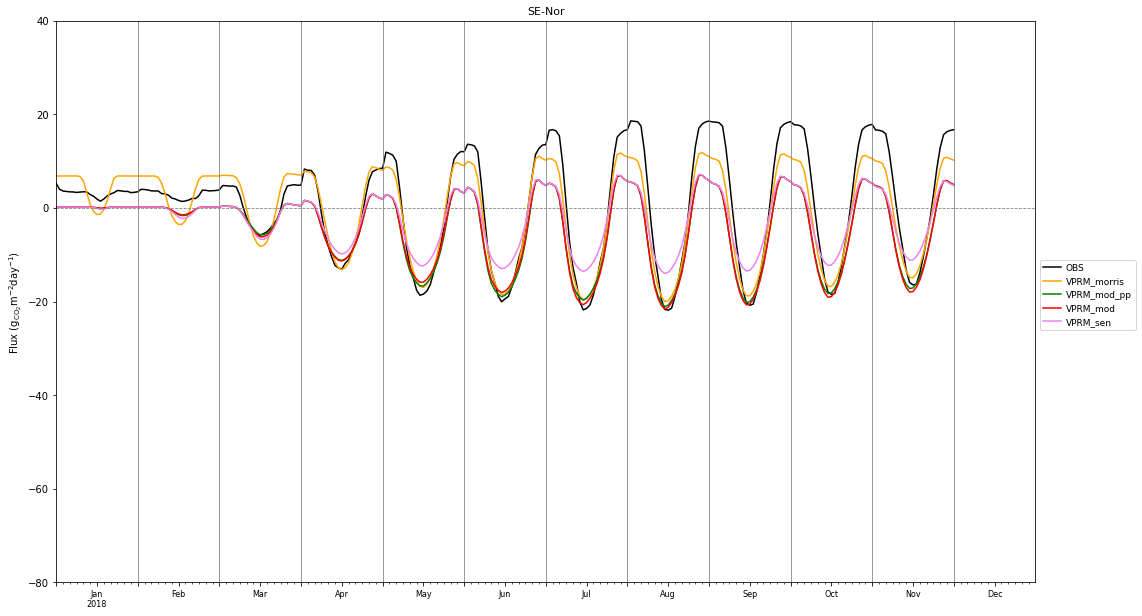

In [15]:
label = 'Original' 
unit = '($\mathrm{g_{CO_2} m^{-2} day^{-1}}$)'

# begin = [datetime.datetime(year, 1, 1, 0, 0, 0), datetime.datetime(year, 2, 1, 0, 0, 0), datetime.datetime(year, 3, 1, 0, 0, 0),
#              datetime.datetime(year, 4, 1, 0, 0, 0), datetime.datetime(year, 5, 1, 0, 0, 0), datetime.datetime(year, 6, 1, 0, 0, 0),
#              datetime.datetime(year, 7, 1, 0, 0, 0), datetime.datetime(year, 8, 1, 0, 0, 0), datetime.datetime(year, 9, 1, 0, 0, 0),
#              datetime.datetime(year, 10, 1, 0, 0, 0), datetime.datetime(year, 11, 1, 0, 0, 0), datetime.datetime(year, 12, 1, 0, 0, 0)]



# end = [datetime.datetime(year, 1, 31, 23, 0, 0), datetime.datetime(year, 2, 28, 23, 0, 0), datetime.datetime(year, 3, 31, 23, 0, 0),
#            datetime.datetime(year, 4, 30, 23, 0, 0), datetime.datetime(year, 5, 31, 23, 0, 0), datetime.datetime(year, 6, 30, 23, 0, 0),
#            datetime.datetime(year, 7, 31, 23, 0, 0), datetime.datetime(year, 8, 31, 23, 0, 0), datetime.datetime(year, 9, 30, 23, 0, 0),
#            datetime.datetime(year, 10, 31, 23, 0, 0), datetime.datetime(year, 11, 30, 23, 0, 0), datetime.datetime(year, 12, 31, 23, 0, 0)]

morris_nee = []
mod_pp_nee = []
mod_nee = []
sen_nee = []
obs_nee = []

begin = pd.date_range("2018-01-31", periods=12)
end = pd.date_range("2018-01-31", periods=12, freq="M")

for month in range(len(begin)):

    df_opt_m = df[begin[month]:end[month]]
    df_opt_mean = df_opt_m.groupby([df_opt_m.index.hour]).mean()
    obs_nee.append(df_opt_mean[label])

    morris_nee.append(df_opt_mean.NEE_morris)

    mod_pp_nee.append(df_opt_mean[station + '_NEE_mod_pp'])
    
    mod_nee.append(df_opt_mean[station + '_NEE_mod'])
    
    sen_nee.append(df_opt_mean[station + '_NEE_sen'])


    
sen_nee = flatten_list_2d(sen_nee)
mod_nee = flatten_list_2d(mod_nee)
morris_nee = flatten_list_2d(morris_nee)
obs_nee = flatten_list_2d(obs_nee)
mod_pp_nee = flatten_list_2d(mod_pp_nee)

# print(len(obs_nee))

time_day = np.arange(0,len(obs_nee))
fig,ax = plt.subplots(figsize=(20,10))
plt.subplots_adjust(left=0.13, right=0.81, top=0.9, bottom=0.12)
colors = ['b','m','c']
ax.plot(time_day, obs_nee, linewidth=1.5, color='k', label='OBS')
ax.plot(time_day, morris_nee, linewidth=1.5, color = 'orange', label='VPRM_morris')
ax.plot(time_day, mod_pp_nee, linewidth=1.5, color = 'g', label='VPRM_mod_pp')
ax.plot(time_day, mod_nee, linewidth=1.5, color = 'r', label='VPRM_mod')
ax.plot(time_day, sen_nee, linewidth=1.5, color = 'violet', label='VPRM_sen')


legend=ax.legend(loc='center left', shadow=False, fontsize=9, ncol=1, handletextpad=0.5, bbox_to_anchor=(1., 0.512))
ax.set_xlim(0, 288)
ax.set_ylim(-80, 40)
for tt in range(24,288,24):
    ax.axvline(tt, color='grey', linewidth=0.8)
ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.ylabel('Flux '+unit, fontsize=10)
major_ticks = np.arange(0, 288, 12)
minor_ticks = np.arange(0, 288, 2)
ax.xaxis.set_ticks(major_ticks)
#ax.set_xticklabels([0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12])
ax.set_xticklabels(['','Jan\n'+str(year),'','Feb','','Mar','','Apr','','May','','Jun','','Jul','','Aug','','Sep','','Oct','','Nov','','Dec'])
ax.xaxis.set_ticks(minor_ticks, minor = True)
ax.xaxis.set_tick_params(which='major', labelsize=8)
ax.set_title(station, fontsize=11)



In [16]:
# pathout = cwd
# plt.savefig(pathout+station+'_diurnal_'+str(year)+'.png',dpi=300)

In [17]:
# #Test for significant difference (no normality) 
# stat, p = stats.wilcoxon(df.iloc[:,1],df.iloc[:,2])
# print(p)
# stat, p = stats.wilcoxon(df.iloc[:,1],df.iloc[:,3])
# print(p)
# stat, p = stats.wilcoxon(df.iloc[:,1],df.iloc[:,4])
# print(p)
# stat, p = stats.wilcoxon(df.iloc[:,1],df.iloc[:,5])
# print(p)